In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the dataset
file_path = './CO2 Emissions_Canada.csv' 
data = pd.read_csv(file_path)

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_engine_size = np.random.choice(data['Engine Size(L)'], 100)
sample_cylinders = np.random.choice(data['Cylinders'], 100)
sample_fuel_L_100km = np.random.choice(data['Fuel Consumption Comb (L/100 km)'], 100)

# Calculate means and standard deviations
mean_engine_size = np.mean(sample_engine_size)
std_engine_size = np.std(sample_engine_size, ddof=1)
mean_cylinders = np.mean(sample_cylinders)
std_cylinders = np.std(sample_cylinders, ddof=1)
mean_fuel_L_100km = np.mean(sample_fuel_L_100km)
std_fuel_L_100km = np.std(sample_fuel_L_100km, ddof=1)

# Hypothesis testing for Engine Size vs Cylinders
t_statistic_engine_cylinders, p_value_engine_cylinders = stats.ttest_ind(sample_engine_size, sample_cylindehars)
# Confidence Interval for Engine Size
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical_engine = stats.t.ppf(1 - alpha/2, df=len(sample_engine_size)-1)
margin_of_error_engine = t_critical_engine * (std_engine_size / np.sqrt(len(sample_engine_size)))
confidence_interval_engine = (mean_engine_size - margin_of_error_engine, mean_engine_size + margin_of_error_engine)

# Confidence Interval for Cylinders
t_critical_cylinders = stats.t.ppf(1 - alpha/2, df=len(sample_cylinders)-1)
margin_of_error_cylinders = t_critical_cylinders * (std_cylinders / np.sqrt(len(sample_cylinders)))
confidence_interval_cylinders = (mean_cylinders - margin_of_error_cylinders, mean_cylinders + margin_of_error_cylinders)

# Hypothesis testing for Engine Size vs Fuel Consumption Comb (L/100 km)
t_statistic_engine_fuel, p_value_engine_fuel = stats.ttest_ind(sample_engine_size, sample_fuel_L_100km)
# Confidence Interval for Fuel Consumption Comb (L/100 km)
t_critical_fuel = stats.t.ppf(1 - alpha/2, df=len(sample_fuel_L_100km)-1)
margin_of_error_fuel = t_critical_fuel * (std_fuel_L_100km / np.sqrt(len(sample_fuel_L_100km)))
confidence_interval_fuel = (mean_fuel_L_100km - margin_of_error_fuel, mean_fuel_L_100km + margin_of_error_fuel)

# Print the results
print("Mean and SD for Engine Size(L):", mean_engine_size, std_engine_size)
print("Mean and SD for Cylinders:", mean_cylinders, std_cylinders)
print("Mean and SD for Fuel Consumption Comb (L/100 km):", mean_fuel_L_100km, std_fuel_L_100km)
print("T-test result for Engine Size vs Cylinders:", t_statistic_engine_cylinders, p_value_engine_cylinders)
print("Confidence Interval for Engine Size(L):", confidence_interval_engine)
print("Confidence Interval for Cylinders:", confidence_interval_cylinders)
print("T-test result for Engine Size vs Fuel Consumption Comb (L/100 km):", t_statistic_engine_fuel, p_value_engine_fuel)
print("Confidence Interval for Fuel Consumption Comb (L/100 km):", confidence_interval_fuel)


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv(file_path)

# Set seed for reproducibility
np.random.seed(0)

# Randomly select 100 samples from each of the three variables
sample_engine_size = np.random.choice(data['Engine Size(L)'], 100)
sample_cylinders = np.random.choice(data['Cylinders'], 100)
sample_fuel_L_100km = np.random.choice(data['Fuel Consumption Comb (L/100 km)'], 100)

# Correlation between Engine Size and Cylinders
correlation_engine_cylinders, p_value_engine_cylinders = stats.pearsonr(sample_engine_size, sample_cylinders)
# Correlation between Engine Size and Fuel Consumption Comb (L/100 km)
correlation_engine_fuel, p_value_engine_fuel = stats.pearsonr(sample_engine_size, sample_fuel_L_100km)

# Calculate the confidence intervals for the correlation coefficients
def correlation_ci(correlation, sample_size, confidence_level=0.95):
    z = np.arctanh(correlation)
    se = 1 / np.sqrt(sample_size - 3)
    z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_interval = z + np.array([-1, 1]) * z_critical * se
    return np.tanh(z_interval)

ci_engine_cylinders = correlation_ci(correlation_engine_cylinders, len(sample_engine_size))
ci_engine_fuel = correlation_ci(correlation_engine_fuel, len(sample_engine_size))

# Print the results
print("Correlation and p-value for Engine Size vs Cylinders:", correlation_engine_cylinders, p_value_engine_cylinders)
print("Confidence Interval for correlation between Engine Size and Cylinders:", ci_engine_cylinders)
print("Correlation and p-value for Engine Size vs Fuel Consumption Comb (L/100 km):", correlation_engine_fuel, p_value_engine_fuel)
print("Confidence Interval for correlation between Engine Size and Fuel Consumption Comb (L/100 km):", ci_engine_fuel)


Correlation and p-value for Engine Size vs Cylinders: -0.11600196796587436 0.2504239584830104
Confidence Interval for correlation between Engine Size and Cylinders: [-0.30546021  0.08229114]
Correlation and p-value for Engine Size vs Fuel Consumption Comb (L/100 km): 2.527872323231442e-06 0.9999800840806273
Confidence Interval for correlation between Engine Size and Fuel Consumption Comb (L/100 km): [-0.19641569  0.19642055]


In [6]:
df = data
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Randomly select 100 samples for Engine Size(L) and CO2 Emissions(g/km)
np.random.seed(0)
sample_indices = np.random.choice(df.index, size=100, replace=False)
sample_engine_size = df['Engine Size(L)'].loc[sample_indices]
target_variable = df['CO2Emissions'].loc[sample_indices]

# Create the linear regression model
model = LinearRegression()
model.fit(sample_engine_size.values.reshape(-1, 1), target_variable)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Predictions
predictions = model.predict(sample_engine_size.values.reshape(-1, 1))

# R-squared
r2 = r2_score(target_variable, predictions)

# Print the regression equation and R-squared value
print(f"Linear Regression Equation: CO2 Emissions(g/km) = {intercept:.4f} + {slope:.4f}(Engine Size(L))")
print(f"R-squared: {r2:.4f}")


Linear Regression Equation: CO2 Emissions(g/km) = 147.3195 + 34.5538(Engine Size(L))
R-squared: 0.6532


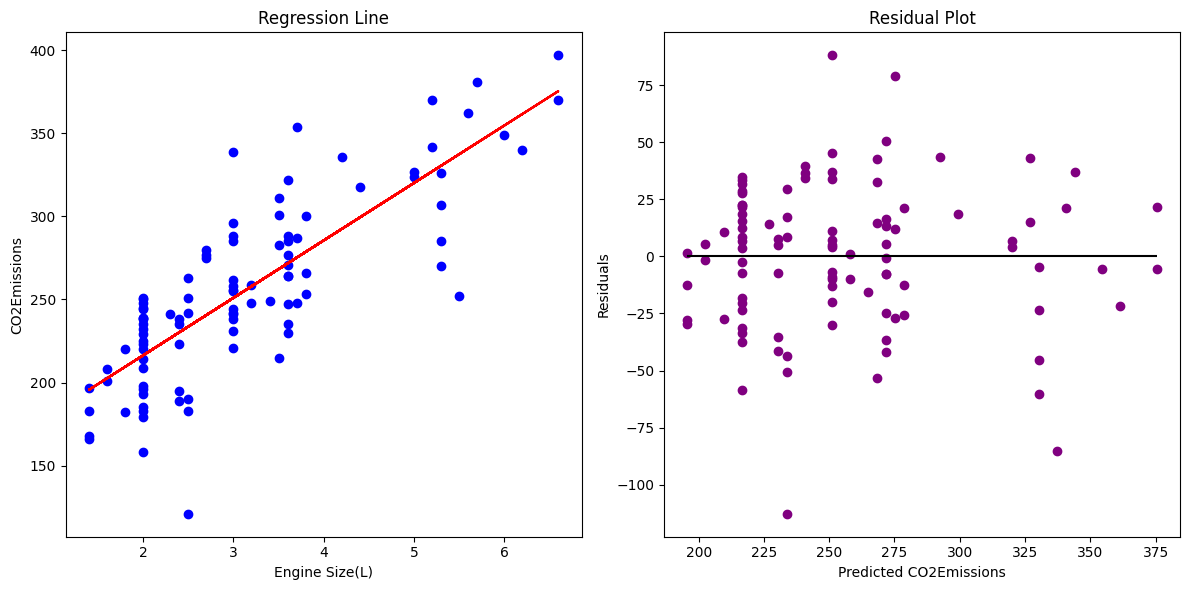

Linear Regression Equation: CO2 Emissions(g/km) = 147.3195 + 34.5538(Engine Size(L))
R-squared: 0.6532


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Randomly select 100 samples for Engine Size(L) and CO2 Emissions(g/km)
np.random.seed(0)
sample_indices = np.random.choice(df.index, size=100, replace=False)
sample_engine_size = df['Engine Size(L)'].loc[sample_indices]
target_variable = df['CO2Emissions'].loc[sample_indices]

# Create the linear regression model
model = LinearRegression()
model.fit(sample_engine_size.values.reshape(-1, 1), target_variable)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Predictions
predictions = model.predict(sample_engine_size.values.reshape(-1, 1))

# R-squared
r2 = r2_score(target_variable, predictions)

# Plotting
plt.figure(figsize=(12, 6))

# Regression Line Plot
plt.subplot(1, 2, 1)
plt.scatter(sample_engine_size, target_variable, color='blue')
plt.plot(sample_engine_size, predictions, color='red')
plt.title('Regression Line')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2Emissions')

# Residual Plot
plt.subplot(1, 2, 2)
residuals = target_variable - predictions
plt.scatter(predictions, residuals, color='purple')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='black')
plt.title('Residual Plot')
plt.xlabel('Predicted CO2Emissions')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print the regression equation and R-squared value
print(f"Linear Regression Equation: CO2 Emissions(g/km) = {intercept:.4f} + {slope:.4f}(Engine Size(L))")
print(f"R-squared: {r2:.4f}")


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame and it already contains the samples selected previously.

# Define the target variable 'vt' for CO2 Emissions
target_variable = df['CO2Emissions'].loc[sample_indices]

# Initialize the models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Prepare the predictor variables based on the specified combinations
predictors1 = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']].loc[sample_indices]
predictors2 = df[['Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']].loc[sample_indices]
predictors3 = df[['Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Engine Size(L)']].loc[sample_indices]
predictors4 = df[['Fuel Consumption Comb (mpg)', 'Engine Size(L)', 'Cylinders']].loc[sample_indices]

# Fit the models
model1.fit(predictors1, target_variable)
model2.fit(predictors2, target_variable)
model3.fit(predictors3, target_variable)
model4.fit(predictors4, target_variable)

# Calculate R-squared and Adjusted R-squared
def calculate_adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

n = 100  # Number of samples
r2_1 = model1.score(predictors1, target_variable)
adj_r2_1 = calculate_adjusted_r2(r2_1, n, 3)

r2_2 = model2.score(predictors2, target_variable)
adj_r2_2 = calculate_adjusted_r2(r2_2, n, 3)

r2_3 = model3.score(predictors3, target_variable)
adj_r2_3 = calculate_adjusted_r2(r2_3, n, 3)

r2_4 = model4.score(predictors4, target_variable)
adj_r2_4 = calculate_adjusted_r2(r2_4, n, 3)


# Print the Adjusted R-squared values
print(f" R-squared for model 1: {r2_1:.4f}")
print(f" R-squared for model 2: {r2_2:.4f}")
print(f" R-squared for model 3: {r2_3:.4f}")
print(f" R-squared for model 4: {r2_4:.4f}")



# Print the Adjusted R-squared values
print(f"Adjusted R-squared for model 1: {adj_r2_1:.4f}")
print(f"Adjusted R-squared for model 2: {adj_r2_2:.4f}")
print(f"Adjusted R-squared for model 3: {adj_r2_3:.4f}")
print(f"Adjusted R-squared for model 4: {adj_r2_4:.4f}")

# Determine the best model
best_model = max([(adj_r2_1, 1), (adj_r2_2, 2), (adj_r2_3, 3), (adj_r2_4, 4)])
print(f"The best model is model {best_model[1]} with an adjusted R-squared of {best_model[0]:.4f}")


 R-squared for model 1: 0.8388
 R-squared for model 2: 0.8642
 R-squared for model 3: 0.8562
 R-squared for model 4: 0.8628
Adjusted R-squared for model 1: 0.8337
Adjusted R-squared for model 2: 0.8599
Adjusted R-squared for model 3: 0.8517
Adjusted R-squared for model 4: 0.8585
The best model is model 2 with an adjusted R-squared of 0.8599


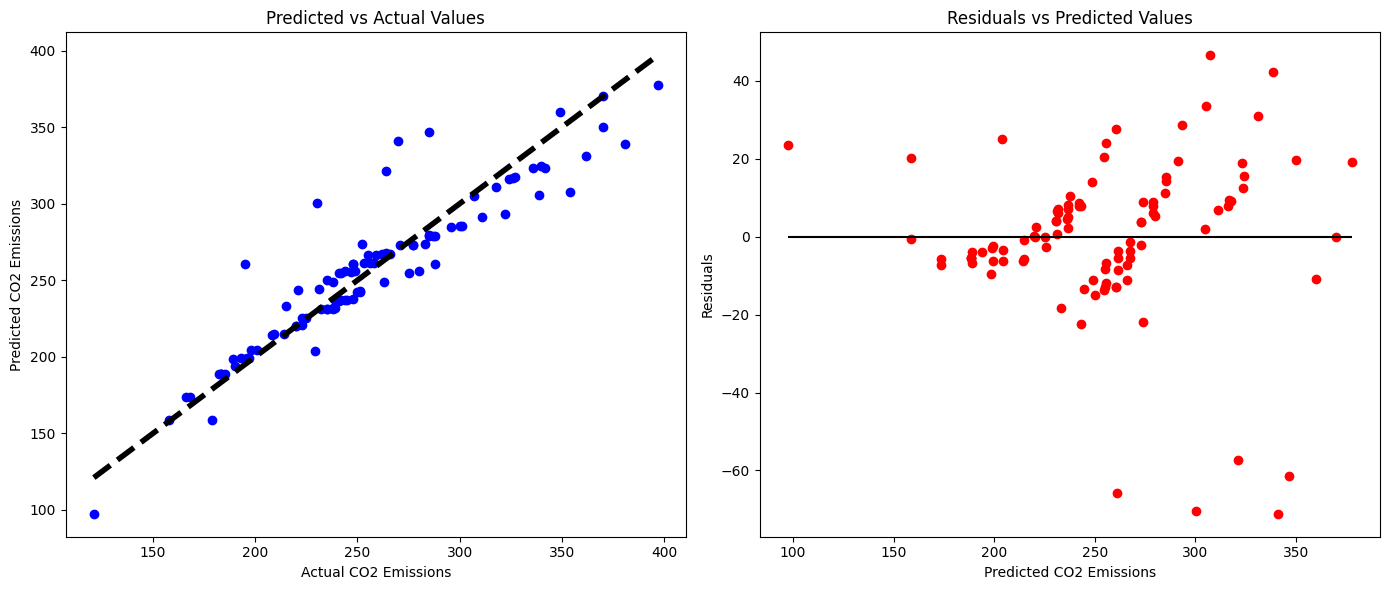

In [12]:
import matplotlib.pyplot as plt

# Assuming 'best_model_index' contains the index of the best-performing model (1, 2, 3, or 4)
# and 'predictions' contains the predicted values from that model.

# Let's say model 1 was the best, for example purposes
best_model_index = 2  # Replace with the index of the best model
if best_model_index == 1:
    predictions = model1.predict(predictors1)
elif best_model_index == 2:
    predictions = model2.predict(predictors2)
elif best_model_index == 3:
    predictions = model3.predict(predictors3)
else:
    predictions = model4.predict(predictors4)

# Plot Predicted vs Actual values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(target_variable, predictions, color='blue')
plt.plot([target_variable.min(), target_variable.max()], [target_variable.min(), target_variable.max()], 'k--', lw=4)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Predicted vs Actual Values')

# Plot Residuals vs Predicted values
residuals = target_variable - predictions

plt.subplot(1, 2, 2)
plt.scatter(predictions, residuals, color='red')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='black')
plt.xlabel('Predicted CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'df' is your DataFrame and it already contains the samples selected previously.

# Define the target variable 'vt' for CO2 Emissions
target_variable = df['CO2Emissions'].loc[sample_indices]

# Initialize the models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Prepare the predictor variables based on the specified combinations
predictors1 = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']].loc[sample_indices]
predictors2 = df[['Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']].loc[sample_indices]
predictors3 = df[['Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'Engine Size(L)']].loc[sample_indices]
predictors4 = df[['Fuel Consumption Comb (mpg)', 'Engine Size(L)', 'Cylinders']].loc[sample_indices]

# Fit the models
model1.fit(predictors1, target_variable)
model2.fit(predictors2, target_variable)
model3.fit(predictors3, target_variable)
model4.fit(predictors4, target_variable)

# Get the coefficients and intercepts for the models
coefficients1 = model1.coef_
intercept1 = model1.intercept_
coefficients2 = model2.coef_
intercept2 = model2.intercept_
coefficients3 = model3.coef_
intercept3 = model3.intercept_
coefficients4 = model4.coef_
intercept4 = model4.intercept_

# Calculate R-squared and Adjusted R-squared
def calculate_adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

n = 100  # Number of samples
r2_1 = model1.score(predictors1, target_variable)
adj_r2_1 = calculate_adjusted_r2(r2_1, n, 3)

r2_2 = model2.score(predictors2, target_variable)
adj_r2_2 = calculate_adjusted_r2(r2_2, n, 3)

r2_3 = model3.score(predictors3, target_variable)
adj_r2_3 = calculate_adjusted_r2(r2_3, n, 3)

r2_4 = model4.score(predictors4, target_variable)
adj_r2_4 = calculate_adjusted_r2(r2_4, n, 3)

# Print the regression equations
print(f"Model 1 Equation: CO2Emissions = {intercept1:.4f} + {coefficients1[0]:.4f}(Engine Size) + {coefficients1[1]:.4f}(Cylinders) + {coefficients1[2]:.4f}(Fuel Consumption L/100km)")
print(f"Model 2 Equation: CO2Emissions = {intercept2:.4f} + {coefficients2[0]:.4f}(Cylinders) + {coefficients2[1]:.4f}(Fuel Consumption L/100km) + {coefficients2[2]:.4f}(Fuel Consumption mpg)")
print(f"Model 3 Equation: CO2Emissions = {intercept3:.4f} + {coefficients3[0]:.4f}(Fuel Consumption L/100km) + {coefficients3[1]:.4f}(Fuel Consumption mpg) + {coefficients3[2]:.4f}(Engine Size)")
print(f"Model 4 Equation: CO2Emissions = {intercept4:.4f} + {coefficients4[0]:.4f}(Fuel Consumption mpg) + {coefficients4[1]:.4f}(Engine Size) + {coefficients4[2]:.4f}(Cylinders)")

# Print the R-squared and Adjusted R-squared values
print(f" R-squared for model 1: {r2_1:.4f}")
print(f" R-squared for model 2: {r2_2:.4f}")
print(f" R-squared for model 3: {r2_3:.4f}")
print(f" R-squared for model 4: {r2_4:.4f}")
print(f"Adjusted R-squared for model 1: {adj_r2_1:.4f}")
print(f"Adjusted R-squared for model 2: {adj_r2_2:.4f}")
print(f"Adjusted R-squared for model 3: {adj_r2_3:.4f}")
print(f"Adjusted R-squared for model 4: {adj_r2_4:.4f}")

# Determine the best model
best_model = max([(adj_r2_1, 1), (adj_r2_2, 2), (adj_r2_3, 3), (adj_r2_4, 4)])
print(f"The best model is model {best_model[1]} with an adjusted R-squared of {best_model[0]:.4f}")


Model 1 Equation: CO2Emissions = 45.7998 + -0.5832(Engine Size) + 7.2466(Cylinders) + 15.3385(Fuel Consumption L/100km)
Model 2 Equation: CO2Emissions = 273.6207 + 9.0790(Cylinders) + 3.9538(Fuel Consumption L/100km) + -4.2318(Fuel Consumption mpg)
Model 3 Equation: CO2Emissions = 285.1778 + 3.8375(Fuel Consumption L/100km) + -4.2291(Fuel Consumption mpg) + 12.9043(Engine Size)
Model 4 Equation: CO2Emissions = 339.1570 + -5.3117(Fuel Consumption mpg) + 4.4777(Engine Size) + 7.8899(Cylinders)
 R-squared for model 1: 0.8388
 R-squared for model 2: 0.8642
 R-squared for model 3: 0.8562
 R-squared for model 4: 0.8628
Adjusted R-squared for model 1: 0.8337
Adjusted R-squared for model 2: 0.8599
Adjusted R-squared for model 3: 0.8517
Adjusted R-squared for model 4: 0.8585
The best model is model 2 with an adjusted R-squared of 0.8599
